In [279]:
import pymc as pm
import numpy as np
import matplotlib.pyplot as plt, seaborn as sns
%matplotlib inline

In [280]:
k,gamma,D = 1.0,1.0,1.0
delta_t=0.01
ampl = np.sqrt(2*D*delta_t)

In [281]:
# random force
w=np.random.normal(0,1,10000)

In [289]:
from itertools import accumulate
def next_point(x,y):
    return x - k/gamma*x*delta_t + ampl*y

xx = accumulate(w, next_point)
plt.plot(xx)

ImportError: cannot import name accumulate

In [282]:
# differential equation x_i = x_(i-1) - k/gamma*x_(i-1) + sqrt(2*D*delta_t)*w_i
x=np.zeros(10000)
x[0]=w[9999] # inital value is random
# can this be done more efficiently? For example, with a cummulative sum? itertools.accumulate?
for i in range(9999):
    x[i+1] = x[i] - k/gamma*x[i]*delta_t + ampl*w[i]

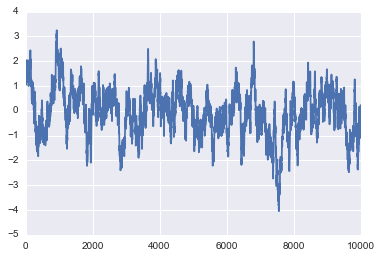

In [283]:
plt.plot(x)

In [284]:
print "std: ",x.std(),"mean: ",x.mean()

std:  0.969047289954 mean:  -0.0823647350477


In [285]:
# see http://docs.scipy.org/doc/scipy-0.15.1/reference/generated/scipy.signal.fftconvolve.html
from scipy import signal
autocorr = signal.fftconvolve(x, x[::-1], mode='full')

19999


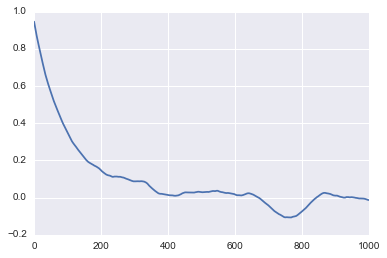

In [286]:
n=len(autocorr)
print n
autocorr=autocorr[(n-1)/2:]*2.0/(n+1)
plt.plot(autocorr[:1000])

In [287]:
import lmfit as lm

[[Model]]
    Model(exponential)
[[Fit Statistics]]
    # function evals   = 28
    # data points      = 1000
    # variables        = 2
    chi-square         = 1.186
    reduced chi-square = 0.001
[[Variables]]
    amplitude:   0.90766667 +/- 0.006527 (0.72%) (init= 0.3518896)
    decay:       109.552515 +/- 1.119290 (1.02%) (init= 237.8838)
[[Correlations]] (unreported correlations are <  0.250)
    C(amplitude, decay)          = -0.704 



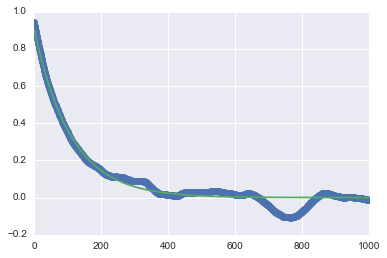

In [288]:
from lmfit.models import ExponentialModel

mod = ExponentialModel()
y = autocorr[:1000]
t = np.arange(1000)

pars = mod.guess(y, x=t)
out  = mod.fit(y, pars, x=t)
print(out.fit_report(min_correl=0.25))

plt.plot(t,y,"o")
plt.plot(t,out.best_fit)